In [1]:
import metpy.calc as mpcalc
from metpy.units import units
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
def log_interpolation(x, xp, fp, **kwargs):
    sort_args = np.argsort(xp)
    interpolated_vals =  np.interp(np.log(x), np.log(xp[sort_args]), fp[sort_args], **kwargs)
    return interpolated_vals

def linear_interpolation(x, xp, fp, **kwargs):
    sort_args = np.argsort(xp)
    interpolated_vals =  np.interp(x, xp[sort_args], fp[sort_args], **kwargs)
    return interpolated_vals

In [4]:
heights = np.linspace(0, 20000, 10) * units.meters

In [5]:
T = (25 - 10 * (heights.m/1000)) * units.degC

In [6]:
p = mpcalc.height_to_pressure_std(heights)

In [7]:
pi = np.arange(1000, 100, -20) * units.hPa
Tlin = linear_interpolation(pi.m, p.m, T.m)
Tlog = log_interpolation(pi.m, p.m, T.m)
hi = mpcalc.pressure_to_height_std(pi).to('m')

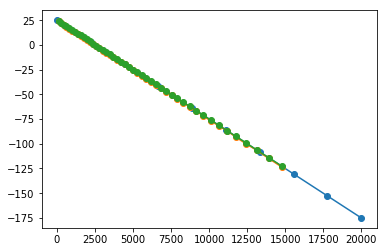

In [8]:
plt.plot(heights, T, marker='o')
plt.plot(hi, Tlin, marker='o')
plt.plot(hi, Tlog, marker='o')

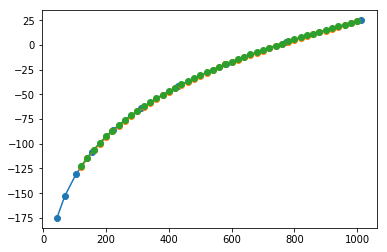

In [9]:
plt.plot(p, T, marker='o')
plt.plot(pi, Tlin, marker='o')
plt.plot(pi, Tlog, marker='o')

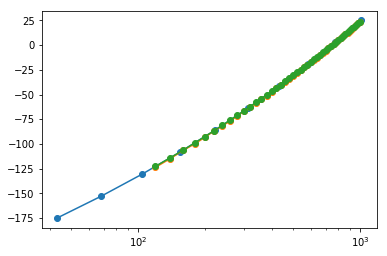

In [10]:
plt.semilogx(p, T, marker='o')
plt.semilogx(pi, Tlin, marker='o')
plt.semilogx(pi, Tlog, marker='o')

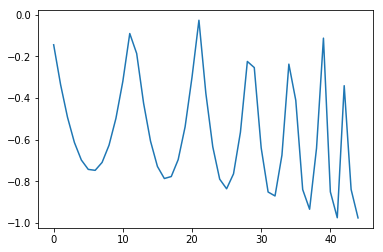

In [11]:
plt.plot(Tlin-Tlog)